# **Preprocessing of Data: Music Genre Classification**


In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [27]:
df = pd.read_csv('train.csv', index_col = 0)
categories = {'Acoustic/Folk': 0,
              'AltMusic': 1,
              'Blues': 2,
              'Bollywood': 3,
              'Country': 4,
              'HipHop': 5,
              'Indie Alt': 6,
              'Instrumental': 7,
              'Metal': 8,
              'Pop': 9}
df.head()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.01710,NaN,0.0849,0.899,134.071,234596.0,4,5
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.48600,0.000196,0.3940,0.787,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.02120,NaN,0.1220,0.569,107.033,173968.0,4,5
5,The Stooges,Search and Destroy - Iggy Pop Mix,53.0,0.235,0.977,6.0,0.878,1,0.1070,0.00353,0.006040,0.1720,0.241,152.952,208133.0,4,6
6,Solomon Burke,None Of Us Are Free,48.0,0.674,0.658,5.0,-9.647,0,0.1040,0.40400,0.000001,0.0981,0.677,143.292,329387.0,4,2


In [28]:
# Size
df.shape

(13047, 17)

In [29]:
df['Class'].value_counts()*100/df.shape[0]

6    19.828313
9    19.345443
8    14.210163
5    11.090672
1    10.523492
2     9.749368
0     4.790373
7     4.414808
3     3.081168
4     2.966199
Name: Class, dtype: float64

### **Balance of Classes**

Because there is a significant unbalance between classes to be predicted, we will focus on the top 4 classes: 5, 6, 8, 9.

In [30]:
# List of values to drop dataset 8 con music 9 salio
arr = [5, 6, 8, 9]

# Drop rows where 'Class' column is not in the list 'arr'

df = df[df['Class'].isin(arr)]
df['Class'].value_counts()*100/df.shape[0]

6    30.753685
9    30.004755
8    22.039943
5    17.201617
Name: Class, dtype: float64

To ensure balance, we will stablish that each class must represent the exact same proportion of the data. To accomplish this, we will randonmly choose a fraction of the data (if it exceeds the desired percentage), or randomly choose observations with replacement, which means that we can choose an observation more than once (in case we have less than the desired percentage).

In [31]:
# Oversampling and Subsampling
class_counts = df['Class'].value_counts()
desired_count = int(0.25 * df.shape[0])
balanced_df = pd.DataFrame()
for class_name, count in class_counts.items():
    # Current class
    class_df = df[df['Class'] == class_name]

    # Random rows to achieve 25%
    selected_rows = class_df.sample(n=desired_count, random_state=42, replace = True)

    balanced_df = pd.concat([balanced_df, selected_rows])

# Shuffle observations
balanced_df = balanced_df.sample(frac=1, random_state=42)

In [32]:
balanced_df

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
8676,Idan Amedi,◊î◊™◊ó◊ú◊î ◊ó◊ì◊©◊î,27.0,0.447,0.766,7.0,-5.833,1,0.0340,0.638000,0.000004,0.2740,0.6360,132.616,235893.0,4,9
11957,Ov Sulfur,Bathe in the Flame,30.0,0.445,0.995,6.0,-3.790,1,0.1340,0.002090,0.000214,0.2280,0.0363,129.971,240000.0,4,8
9557,Fugees,Ready or Not,72.0,0.607,0.422,10.0,-13.364,0,0.4990,0.209000,NaN,0.0839,0.5630,130.470,226987.0,3,6
1401,Brent Faiyaz,"Gravity (feat. Tyler, The Creator)",79.0,0.539,0.615,1.0,-8.746,0,0.2520,0.173000,0.005600,0.1440,0.4930,163.924,214693.0,4,5
4951,Jon Hopkins,Singularity,48.0,0.526,0.776,1.0,-8.873,1,0.0597,0.003890,0.841000,0.0865,0.0504,132.996,389200.0,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13199,Backyard Babies,Brand New Hate,22.0,0.382,0.957,8.0,-2.859,1,0.0613,0.000072,0.000102,0.0902,0.7000,181.094,179293.0,4,8
6633,Kill the Kong,CTRL,NaN,0.474,0.984,6.0,-3.169,1,0.1130,0.000301,NaN,0.1060,0.3720,95.025,211579.0,4,8
1235,Cradle Of Filth,Cruelty Brought Thee Orchids,39.0,0.262,0.983,NaN,-4.855,0,0.1020,0.000977,0.006870,0.2940,0.3660,132.606,438733.0,4,8
15057,Gizmo Varillas,A La Vida,35.0,0.601,0.689,11.0,-5.826,0,0.0411,0.255000,0.004690,0.2260,0.8520,89.982,185227.0,4,6


In [33]:
df = balanced_df.copy()

In [34]:
df['Class'].value_counts()*100/df.shape[0]

9    25.0
8    25.0
6    25.0
5    25.0
Name: Class, dtype: float64

### **Missing Values and Irrelevant Columns**

In [35]:
# Id Variables
print(df['Artist Name'].nunique())
print(df['Track Name'].nunique())

# Missing Values
print(df.isna().sum() / df.shape[0])

# Too many Artist Names and Tracks Names. Those variables cannot be used to predict the genre.
# Instrumentalness has a lot of missing values.

df.drop(columns = ['Artist Name', 'Track Name', 'instrumentalness'], inplace = True)

# Deleting rows with missing values
df_cleaned = df.dropna()
df_cleaned.isna().sum()

3517
4909
Artist Name           0.000000
Track Name            0.000000
Popularity            0.016881
danceability          0.000000
energy                0.000000
key                   0.098431
loudness              0.000000
mode                  0.000000
speechiness           0.000000
acousticness          0.000000
instrumentalness      0.321208
liveness              0.000000
valence               0.000000
tempo                 0.000000
duration_in min/ms    0.000000
time_signature        0.000000
Class                 0.000000
dtype: float64


Popularity            0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
liveness              0
valence               0
tempo                 0
duration_in min/ms    0
time_signature        0
Class                 0
dtype: int64

In [36]:
df_cleaned.head()

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
8676,27.0,0.447,0.766,7.0,-5.833,1,0.0340,0.63800,0.2740,0.6360,132.616,235893.0,4,9
11957,30.0,0.445,0.995,6.0,-3.790,1,0.1340,0.00209,0.2280,0.0363,129.971,240000.0,4,8
9557,72.0,0.607,0.422,10.0,-13.364,0,0.4990,0.20900,0.0839,0.5630,130.470,226987.0,3,6
1401,79.0,0.539,0.615,1.0,-8.746,0,0.2520,0.17300,0.1440,0.4930,163.924,214693.0,4,5
4951,48.0,0.526,0.776,1.0,-8.873,1,0.0597,0.00389,0.0865,0.0504,132.996,389200.0,4,6


In [37]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7459 entries, 8676 to 10425
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Popularity          7459 non-null   float64
 1   danceability        7459 non-null   float64
 2   energy              7459 non-null   float64
 3   key                 7459 non-null   float64
 4   loudness            7459 non-null   float64
 5   mode                7459 non-null   int64  
 6   speechiness         7459 non-null   float64
 7   acousticness        7459 non-null   float64
 8   liveness            7459 non-null   float64
 9   valence             7459 non-null   float64
 10  tempo               7459 non-null   float64
 11  duration_in min/ms  7459 non-null   float64
 12  time_signature      7459 non-null   int64  
 13  Class               7459 non-null   int64  
dtypes: float64(11), int64(3)
memory usage: 874.1 KB


### **Outliers**

In [38]:
df_outliers = df_cleaned.copy()
for column in df_outliers.columns[:-1]:
  df_outliers = df_outliers[abs(stats.zscore(df_outliers[column])) < 3]
df_outliers

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
8676,27.0,0.447,0.766,7.0,-5.833,1,0.0340,0.638000,0.2740,0.6360,132.616,235893.0,4,9
11957,30.0,0.445,0.995,6.0,-3.790,1,0.1340,0.002090,0.2280,0.0363,129.971,240000.0,4,8
1401,79.0,0.539,0.615,1.0,-8.746,0,0.2520,0.173000,0.1440,0.4930,163.924,214693.0,4,5
4951,48.0,0.526,0.776,1.0,-8.873,1,0.0597,0.003890,0.0865,0.0504,132.996,389200.0,4,6
3124,58.0,0.500,0.280,7.0,-10.764,0,0.0404,0.880000,0.1020,0.0832,92.457,190253.0,4,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13116,22.0,0.236,0.876,4.0,-6.487,0,0.0866,0.000048,0.1860,0.1050,85.618,350027.0,4,8
5770,51.0,0.282,0.996,9.0,-3.991,1,0.2740,0.006680,0.0674,0.3230,185.423,109307.0,4,8
13199,22.0,0.382,0.957,8.0,-2.859,1,0.0613,0.000072,0.0902,0.7000,181.094,179293.0,4,8
15057,35.0,0.601,0.689,11.0,-5.826,0,0.0411,0.255000,0.2260,0.8520,89.982,185227.0,4,6


### **Correlation Between Variables**

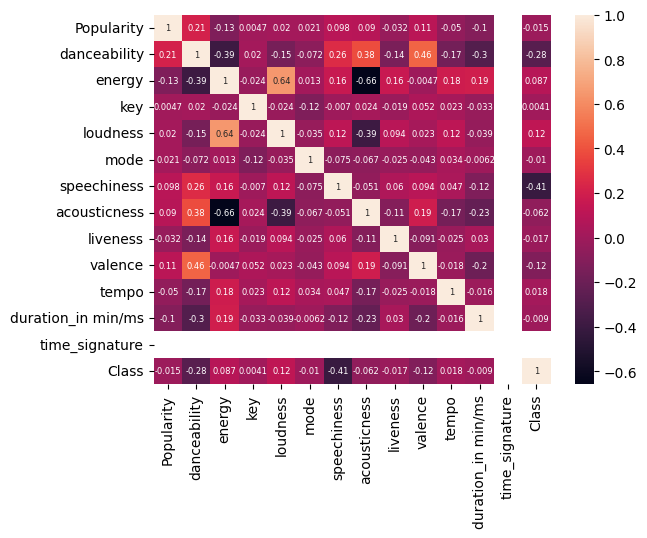

In [39]:
# Spearman
corr = df_outliers.corr(method = 'spearman')
sns.heatmap(corr, annot = True, annot_kws = {'size': 6})
plt.show()

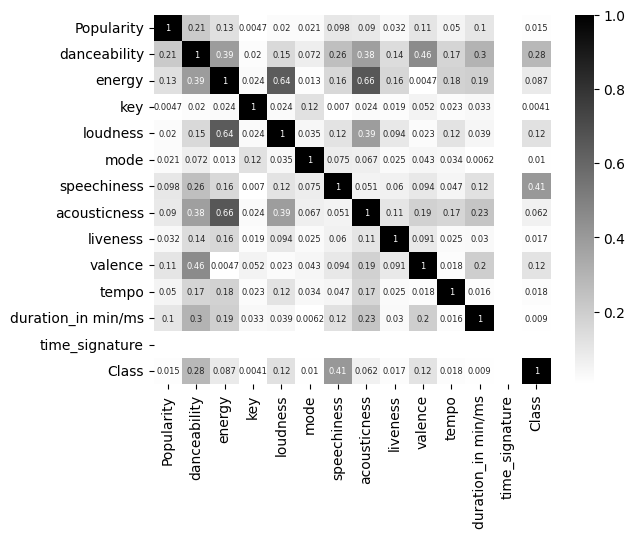

In [40]:
# Energy es muy parecida a loudness y acousticness
sns.heatmap(abs(corr), cmap = 'gray_r', annot = True, annot_kws = {'size': 6})
plt.show()

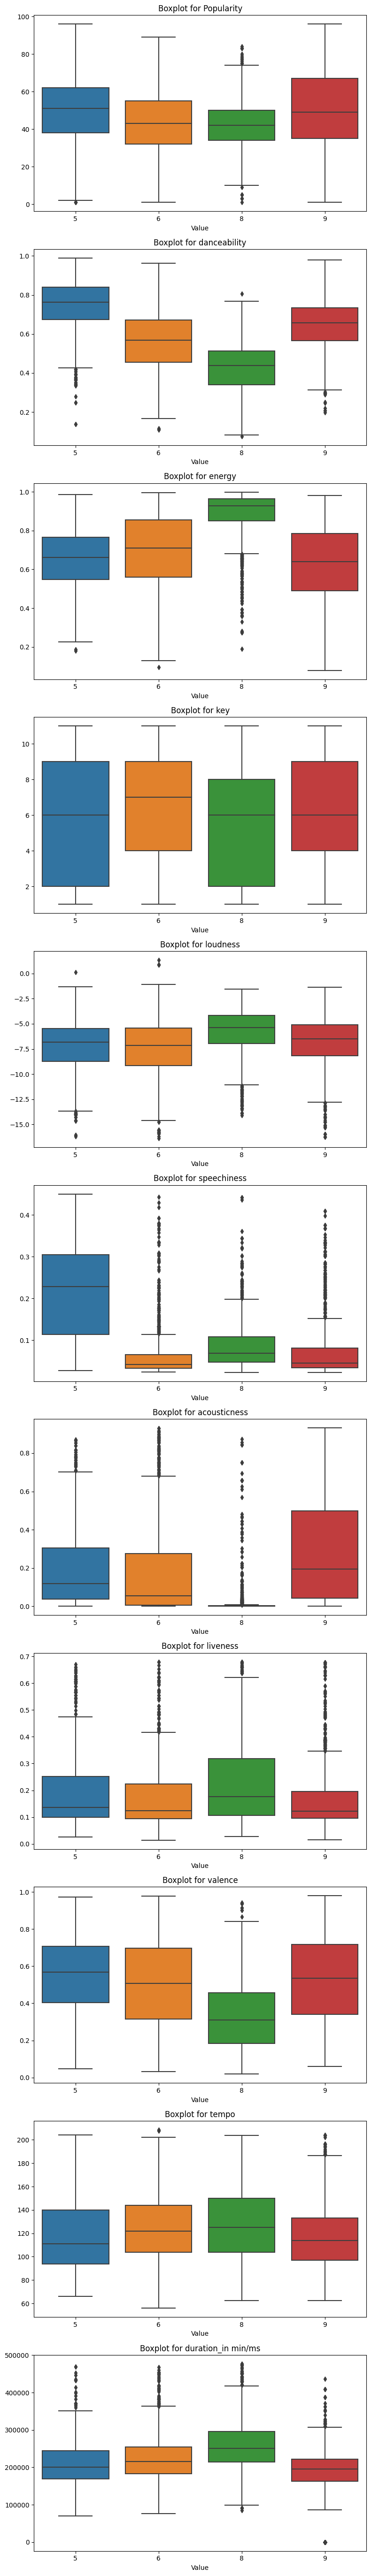

In [41]:
# Create a separate boxplot for each numerical value
num_values = 11
fig, axes = plt.subplots(nrows=num_values, figsize=(8, 5 * num_values))

columns = df_outliers.select_dtypes(include='float64').columns
for i, col in enumerate(columns):
    sns.boxplot(data=df_outliers, x='Class', y=col, ax=axes[i])
    axes[i].set_title(f'Boxplot for {col}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

### **Analysis of Variance**

$H_0$: Groups have no significant effect on the numeric variable.

$H_1$: Groups have significant effect on the numeric variable.

In [42]:
def aov(data, varNum, varCat):
  # Group var1 by var2
  groups = data.groupby(varCat)[varNum].apply(list)

  # Perform one-way ANOVA
  f_statistic, p_value = stats.f_oneway(*groups)

  # Print the ANOVA results
  print("F-statistic:", f_statistic)
  print("p-value:", p_value)

for column in df_outliers.columns[:-1]:
  print('\n', column, '\n', '='*30)
  aov(df_outliers, column, 'Class')


 Popularity 
F-statistic: 99.60070345521386
p-value: 5.088560391342311e-63

 danceability 
F-statistic: 1592.516922381895
p-value: 0.0

 energy 
F-statistic: 724.1249505269375
p-value: 0.0

 key 
F-statistic: 6.103817741255909
p-value: 0.0003838048073095921

 loudness 
F-statistic: 130.918033810288
p-value: 2.5110632655106438e-82

 mode 
F-statistic: 39.56486738714156
p-value: 2.5069609444869064e-25

 speechiness 
F-statistic: 1428.057463958761
p-value: 0.0

 acousticness 
F-statistic: 434.0294439529959
p-value: 7.855349955179832e-257

 liveness 
F-statistic: 51.01862160232952
p-value: 1.396463845500106e-32

 valence 
F-statistic: 334.97160563189016
p-value: 3.867851782331969e-202

 tempo 
F-statistic: 59.3362610130898
p-value: 7.831661387696011e-38

 duration_in min/ms 
F-statistic: 413.2039651842157
p-value: 1.6524093148675857e-245

 time_signature 
F-statistic: nan
p-value: nan


/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:3895: ConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(stats.ConstantInputWarning(msg))


In [43]:
# Tempo and key have similar distribution across the categories, so well exclude them.
# Possible Complementary Analysis: ANOVA to study the real effect of each genre on variance.

df_outliers.drop(columns=['tempo', 'key', 'Popularity', 'liveness', 'energy', 'mode', 'time_signature'], inplace = True)
df_outliers

,danceability,loudness,speechiness,acousticness,valence,duration_in min/ms,Class
8676,0.447,-5.833,0.0340,0.638000,0.6360,235893.0,9
11957,0.445,-3.790,0.1340,0.002090,0.0363,240000.0,8
1401,0.539,-8.746,0.2520,0.173000,0.4930,214693.0,5
4951,0.526,-8.873,0.0597,0.003890,0.0504,389200.0,6
3124,0.500,-10.764,0.0404,0.880000,0.0832,190253.0,9
...,...,...,...,...,...,...,...
13116,0.236,-6.487,0.0866,0.000048,0.1050,350027.0,8
5770,0.282,-3.991,0.2740,0.006680,0.3230,109307.0,8
13199,0.382,-2.859,0.0613,0.000072,0.7000,179293.0,8
15057,0.601,-5.826,0.0411,0.255000,0.8520,185227.0,6


### **Data Transformation**

In [44]:
# Scaling the data with function of minmax scaling that returns a new dataframe
def minmax(value, min_value, max_value):
    return (value - min_value) / (max_value - min_value)

def minmax_scaling(dataframe):
    dataframe_scale = pd.DataFrame()

    for column in dataframe.columns:
        min_value = dataframe[column].min()
        max_value = dataframe[column].max()
        dataframe_scale[column] = dataframe[column].apply(lambda x: minmax(x, min_value, max_value))

    return dataframe_scale

df_scaled = minmax_scaling(df_outliers)
df_scaled['Class'] = df_outliers['Class']

df_scaled

,danceability,loudness,speechiness,acousticness,valence,duration_in min/ms,Class
8676,0.407002,0.594976,0.024848,0.684549,0.642969,0.494506,9
11957,0.404814,0.710302,0.259259,0.002242,0.018736,0.503115,8
1401,0.507659,0.430539,0.535865,0.185622,0.494119,0.450064,5
4951,0.493435,0.423370,0.085091,0.004174,0.033413,0.815886,6
3124,0.464989,0.316624,0.039850,0.944206,0.067555,0.398829,9
...,...,...,...,...,...,...,...
13116,0.176149,0.558058,0.148148,0.000051,0.090247,0.733767,8
5770,0.226477,0.698956,0.587436,0.007167,0.317165,0.229141,8
13199,0.335886,0.762856,0.088842,0.000078,0.709587,0.375854,8
15057,0.575492,0.595371,0.041491,0.273605,0.867805,0.388293,6


In [45]:
df_scaled

,danceability,loudness,speechiness,acousticness,valence,duration_in min/ms,Class
8676,0.407002,0.594976,0.024848,0.684549,0.642969,0.494506,9
11957,0.404814,0.710302,0.259259,0.002242,0.018736,0.503115,8
1401,0.507659,0.430539,0.535865,0.185622,0.494119,0.450064,5
4951,0.493435,0.423370,0.085091,0.004174,0.033413,0.815886,6
3124,0.464989,0.316624,0.039850,0.944206,0.067555,0.398829,9
...,...,...,...,...,...,...,...
13116,0.176149,0.558058,0.148148,0.000051,0.090247,0.733767,8
5770,0.226477,0.698956,0.587436,0.007167,0.317165,0.229141,8
13199,0.335886,0.762856,0.088842,0.000078,0.709587,0.375854,8
15057,0.575492,0.595371,0.041491,0.273605,0.867805,0.388293,6


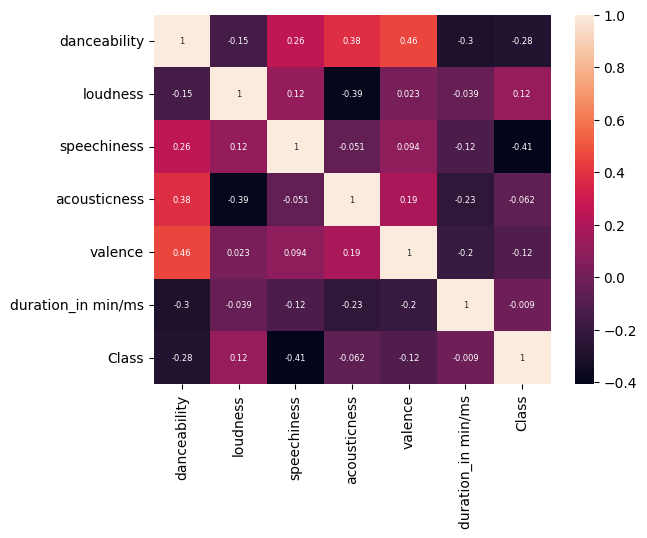

In [46]:
# Spearman
corr = df_scaled.corr(method = 'spearman')
sns.heatmap(corr, annot = True, annot_kws = {'size': 6})
plt.show()

In [47]:
df_scaled.isna().sum()

danceability          0
loudness              0
speechiness           0
acousticness          0
valence               0
duration_in min/ms    0
Class                 0
dtype: int64

In [48]:
# Export final dataframe to csv file
df_scaled.to_csv('music_data.csv')